In [1]:
import torch as nn 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np 

import os
# change working directory
os.chdir('/Users/gerardogutierrez/Desktop/Academics/Spring_2026/plant-health-status/Notebooks')

pd.set_option('display.max_columns', None)  # Show all columns in DataFrame display

In [2]:
# load data 

import torch


df = (pd.read_csv('../Data/regression_data.csv')
      )

target_col = 'total_fresh_weight_g'

X = df.drop(columns=[target_col]).to_numpy(dtype=np.float32)
y = df[target_col].to_numpy(dtype=np.float32).reshape(-1, 1)

feature_names = df.drop(columns=[target_col]).columns.tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

# convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)



In [3]:
df

,total_fresh_weight_g,carbon_dioxide,temp_env,humidity,pressure,electrical_conductivity,volume,temp_nutr,volume_flow_rate,weight_lag_1,weight_lag_2
0,40.1,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,33.1,29.1
1,43.4,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,36.3,30.1
2,43.6,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,36.5,29.8
3,44.3,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,38.1,29.7
4,45.0,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,40.1,33.1
5,45.1,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,38.5,30.2
6,46.0,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,39.2,29.3
7,46.2,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,39.2,30.4
8,46.8,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,36.9,29.6
9,49.2,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,42.1,31.8


In [4]:
class BasicNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BasicNN, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x 
        

In [5]:
input_size = X_train_tensor.shape[1]
model = BasicNN(input_size=input_size, hidden_size=32, output_size=1)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

Epoch [1/1000], Train Loss: 16083.7656, Val Loss: 23622.3105
Epoch [2/1000], Train Loss: 16079.3467, Val Loss: 23616.0527
Epoch [3/1000], Train Loss: 16074.9189, Val Loss: 23609.7715
Epoch [4/1000], Train Loss: 16070.4736, Val Loss: 23603.4629
Epoch [5/1000], Train Loss: 16066.0156, Val Loss: 23597.1094
Epoch [6/1000], Train Loss: 16061.5469, Val Loss: 23590.7480
Epoch [7/1000], Train Loss: 16057.0596, Val Loss: 23584.3750
Epoch [8/1000], Train Loss: 16052.5498, Val Loss: 23577.9688
Epoch [9/1000], Train Loss: 16048.0205, Val Loss: 23571.5059
Epoch [10/1000], Train Loss: 16043.4639, Val Loss: 23565.0000
Epoch [11/1000], Train Loss: 16038.8857, Val Loss: 23558.4590
Epoch [12/1000], Train Loss: 16034.2783, Val Loss: 23551.8906
Epoch [13/1000], Train Loss: 16029.6484, Val Loss: 23545.2598
Epoch [14/1000], Train Loss: 16024.9883, Val Loss: 23538.6035
Epoch [15/1000], Train Loss: 16020.3008, Val Loss: 23531.9004
Epoch [16/1000], Train Loss: 16015.5811, Val Loss: 23525.1504
Epoch [17/1000], 

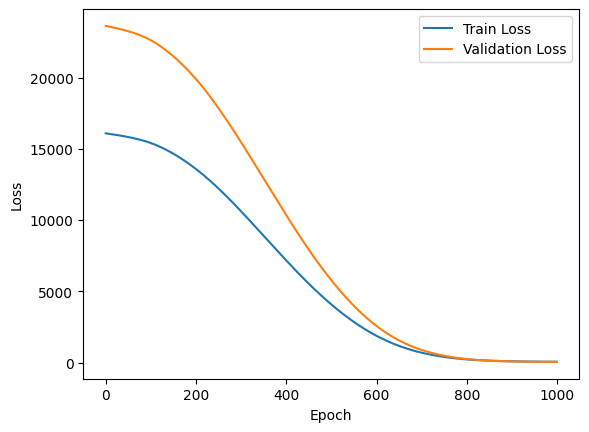

In [6]:
num_epochs = 1000

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    
    # ----- TRAINING -----
    model.train()   # 
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # ----- VALIDATION -----
    model.eval()  # 
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)

    val_losses.append(val_loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {loss.item():.4f}, "
          f"Val Loss: {val_loss.item():.4f}")


import matplotlib.pyplot as plt

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")


plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Baseline RMSE: 6.694146

Permutation importance (bigger = more important):
electrical_conductivity    +20.4294 RMSE
volume_flow_rate           +19.9562 RMSE
volume                     +17.2952 RMSE
weight_lag_2               +15.4641 RMSE
temp_nutr                  +15.2018 RMSE
humidity                   +12.3798 RMSE
weight_lag_1               +8.5960 RMSE
pressure                   +7.2868 RMSE
carbon_dioxide             +4.4514 RMSE
temp_env                   +4.1704 RMSE


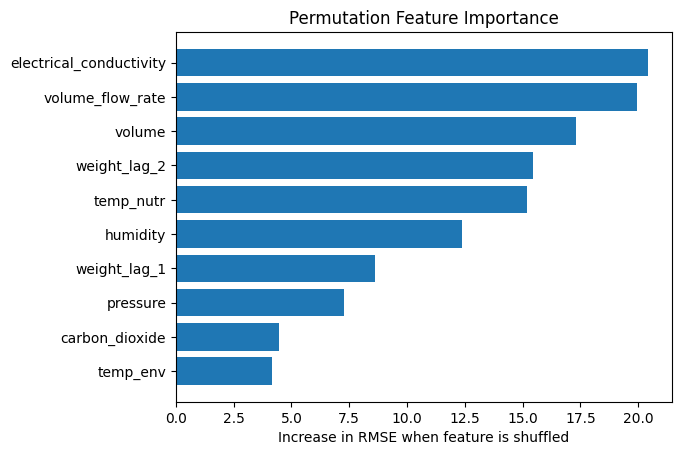

In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# ---- Permutation importance ----
def rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true)**2))

model.eval()

# baseline predictions
with torch.no_grad():
    base_preds = model(X_test_tensor).cpu().numpy()
base_rmse = rmse(base_preds, y_test_tensor.cpu().numpy())

importances = []
X_test_base = X_test_tensor.clone()

for j, name in enumerate(feature_names):
    X_perm = X_test_base.clone()

    # shuffle feature j
    idx = torch.randperm(X_perm.shape[0])
    X_perm[:, j] = X_perm[idx, j]

    # predictions with shuffled feature
    with torch.no_grad():
        preds = model(X_perm).cpu().numpy()

    perm_rmse = rmse(preds, y_test_tensor.cpu().numpy())
    importances.append((name, perm_rmse - base_rmse))  # increase in error

# sort biggest increase first
importances.sort(key=lambda x: x[1], reverse=True)

print("Baseline RMSE:", base_rmse)
print("\nPermutation importance (bigger = more important):")
for name, delta in importances:
    print(f"{name:25s}  +{delta:.4f} RMSE")

# ---- Bar plot ----
names = [n for n, _ in importances]
deltas = [d for _, d in importances]

plt.figure()
plt.barh(names[::-1], deltas[::-1])  # reverse so biggest on top
plt.xlabel("Increase in RMSE when feature is shuffled")
plt.title("Permutation Feature Importance")
plt.show()


shows importance for automation per var


In [8]:
df

,total_fresh_weight_g,carbon_dioxide,temp_env,humidity,pressure,electrical_conductivity,volume,temp_nutr,volume_flow_rate,weight_lag_1,weight_lag_2
0,40.1,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,33.1,29.1
1,43.4,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,36.3,30.1
2,43.6,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,36.5,29.8
3,44.3,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,38.1,29.7
4,45.0,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,40.1,33.1
5,45.1,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,38.5,30.2
6,46.0,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,39.2,29.3
7,46.2,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,39.2,30.4
8,46.8,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,36.9,29.6
9,49.2,514.051020,22.520816,65.247347,99282.511633,1521.816327,11551.277959,25.308837,1.087551,42.1,31.8


In [9]:
print(X_train_tensor.shape)


torch.Size([48, 10])
